In [1]:
import numpy as np
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

## Functions

In [2]:
def spd_coverage_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'train_size', 'df', 'ai_i_cov', 'ai_ii_cov', 'ai_iii_cov', 'ai_iv_cov',
    'lc_i_cov', 'lc_ii_cov', 'lc_iii_cov', 'lc_iv_cov', 'le_i_cov', 'le_ii_cov', 'le_iii_cov', 'le_iv_cov',
    'ai_OOB_quantile', 'lc_OOB_quantile', 'le_OOB_quantile'])
    i = 0
    for file in os.listdir(os.path.join(os.path.join(os.getcwd(), 'results'))):
        if (file.endswith('.npy')):# and file.split('_')[3][5:] == '100'):
            print(i)
            i+=1
            infile=open(os.path.join(os.path.join(os.getcwd(), 'results/' + file)), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'train_size': int(file.split('_')[2][1:]),
            'df': file.split('_')[3][2:],
            'ai_i_cov': [result['ai_i_cov']],
            'ai_ii_cov': [result['ai_ii_cov']],
            'ai_iii_cov': [result['ai_iii_cov']],
            'ai_iv_cov': [result['ai_iv_cov']],
            'lc_i_cov': [result['lc_i_cov']],
            'lc_ii_cov': [result['lc_ii_cov']],
            'lc_iii_cov': [result['lc_iii_cov']],
            'lc_iv_cov': [result['lc_iv_cov']],
            'le_i_cov': [result['le_i_cov']],
            'le_ii_cov': [result['le_ii_cov']],
            'le_iii_cov': [result['le_iii_cov']],
            'le_iv_cov': [result['le_iv_cov']],
            'ai_OOB_quantile': [result['ai_OOB_quantile']],
            'lc_OOB_quantile': [result['lc_OOB_quantile']],
            'le_OOB_quantile': [result['le_OOB_quantile']]
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    coverage_df['train_size'] = coverage_df['train_size'].astype('category')
    coverage_df['df'] = coverage_df.df.astype('category')
    return coverage_df

# Parameters
sample_sizes = [50, 100, 200, 500]  # Sample sizes
df_values = [5, 15]  # Concentration parameters
q = 2

Prediction balls

In [3]:
# Define confidence levels
np.random.seed(1000)
sign_level = np.array([0.01, 0.05, 0.1])
# Load stored results
SPD_coverage_df=spd_coverage_results()
SPD_coverage_df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,sample_index,train_size,df,ai_i_cov,ai_ii_cov,ai_iii_cov,ai_iv_cov,lc_i_cov,lc_ii_cov,lc_iii_cov,lc_iv_cov,le_i_cov,le_ii_cov,le_iii_cov,le_iv_cov,ai_OOB_quantile,lc_OOB_quantile,le_OOB_quantile
0,532,200,5,"[[True, True, True], [True, True, True], [True...","[0.98, 0.94, 0.854]","[[True, True, True], [True, True, True], [True...","[0.985, 0.882, 0.723]","[[True, True, True], [True, True, True], [True...","[0.983, 0.918, 0.85]","[[True, True, True], [True, True, True], [Fals...","[0.963, 0.882, 0.749]","[[True, True, True], [True, True, True], [True...","[0.981, 0.921, 0.857]","[[True, True, True], [True, True, True], [True...","[0.982, 0.828, 0.725]","[3.0057691579871806, 2.331059850594904, 1.9072...","[1.5769721261520144, 1.2445884127653264, 1.059...","[2.97980023941816, 2.164279461602929, 1.892699..."
1,36,100,5,"[[True, True, True], [True, True, True], [True...","[0.968, 0.906, 0.862]","[[True, True, True], [True, True, True], [True...","[0.978, 0.92, 0.868]","[[True, True, True], [True, True, True], [True...","[0.983, 0.929, 0.892]","[[True, True, True], [True, True, True], [True...","[0.985, 0.912, 0.858]","[[True, True, True], [True, True, True], [True...","[0.964, 0.907, 0.866]","[[True, True, True], [True, True, True], [True...","[0.976, 0.92, 0.867]","[2.744344204824416, 2.0619386931581674, 1.8885...","[1.591617204502282, 1.2412849398535712, 1.1173...","[2.6685386393247814, 2.0604238881641233, 1.879..."
2,452,100,15,"[[True, True, True], [True, True, True], [True...","[1.0, 0.995, 0.957]","[[True, True, True], [True, True, True], [True...","[1.0, 0.996, 0.978]","[[True, True, True], [True, True, True], [True...","[1.0, 0.971, 0.902]","[[True, True, True], [True, True, True], [True...","[1.0, 0.982, 0.94]","[[True, True, True], [True, True, True], [True...","[1.0, 0.985, 0.956]","[[True, True, True], [True, True, True], [True...","[1.0, 0.994, 0.972]","[1.673495178454315, 1.4927020795764, 1.2389689...","[1.0517174113560823, 0.7437286126763645, 0.619...","[1.6268460049972977, 1.408944476685207, 1.2129..."
3,604,500,5,"[[True, True, True], [True, True, False], [Tru...","[0.989, 0.953, 0.87]","[[False, False, False], [True, True, True], [T...","[0.995, 0.973, 0.889]","[[True, True, True], [False, False, False], [T...","[0.991, 0.944, 0.894]","[[False, False, False], [True, True, True], [T...","[0.994, 0.952, 0.907]","[[True, True, True], [True, False, False], [Tr...","[0.986, 0.948, 0.875]","[[False, False, False], [True, True, True], [T...","[0.993, 0.967, 0.886]","[3.191052367031675, 2.3270569755974266, 1.8505...","[1.6280533232195893, 1.2726775291611319, 1.110...","[3.0273969589781102, 2.237968459616105, 1.8433..."
4,718,200,15,"[[True, True, True], [True, True, True], [True...","[0.995, 0.951, 0.874]","[[True, True, True], [True, True, True], [True...","[1.0, 0.968, 0.883]","[[True, True, True], [True, True, True], [True...","[0.995, 0.961, 0.903]","[[True, True, True], [True, True, True], [True...","[0.993, 0.963, 0.924]","[[True, True, True], [True, True, True], [True...","[0.996, 0.944, 0.877]","[[True, True, True], [True, True, True], [True...","[0.999, 0.951, 0.879]","[1.4757202540099852, 1.1988417793836086, 1.000...","[0.8671703624806703, 0.7070820915668321, 0.616...","[1.4549003238267355, 1.1595722989187816, 0.990..."


In [5]:
ai_SPD_coverage_df = SPD_coverage_df[['train_size', 'df', 'ai_i_cov', 'ai_ii_cov', 'ai_iii_cov', 'ai_iv_cov', 'ai_OOB_quantile']]
lc_SPD_coverage_df = SPD_coverage_df[['train_size', 'df', 'lc_i_cov', 'lc_ii_cov', 'lc_iii_cov', 'lc_iv_cov', 'lc_OOB_quantile']]
le_SPD_coverage_df = SPD_coverage_df[['train_size', 'df', 'le_i_cov', 'le_ii_cov', 'le_iii_cov', 'le_iv_cov', 'le_OOB_quantile']]

# TYPE I

In [6]:
import pandas as pd
import numpy as np

def calculate_type_i_coverage(coverage_df, sample_sizes, df_values, B=500, random_seed=1):
    """
    Calculate Type I coverage using bootstrap procedure.
    
    Parameters:
    -----------
    pb_coverage_df : DataFrame
        Coverage results dataframe
    sample_sizes : list
        List of sample sizes to analyze
    df_values : list
        List of df values to analyze
    B : int
        Number of bootstrap replicates (default: 1000)
    
    Returns:
    --------
    dict : Bootstrap results with means and standard deviations
    """

    if random_seed is not None:
        np.random.seed(random_seed)
    
    ai_diccionario_i = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    lc_diccionario_i = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    le_diccionario_i = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    for N in sample_sizes:
        for df in df_values:
            print(f"Processing N={N}, df={df}")
            
            # Filter data for current N and df
            coverage_df_N_df = coverage_df[
                (coverage_df['df'] == str(df)) & 
                (coverage_df['train_size'] == N)
            ]
            
            # Get M (number of samples for this N, df combination) and assert it is 1000
            M = len(coverage_df_N_df)
            print(M)
            #assert M == 1000, f"Expected M to be 1000, but got {M} for N={N}, df={df}"
            
            # Bootstrap procedure
            ai_bootstrap_estimates = []  # Will store B bootstrap estimates
            lc_bootstrap_estimates = []  # Will store B bootstrap estimates
            le_bootstrap_estimates = []  # Will store B bootstrap estimates

            ai_coverages = []  # Will store B bootstrap estimates
            lc_coverages = []  # Will store B bootstrap estimates
            le_coverages = []  # Will store B bootstrap estimates

            for m in range(M):
                # Extract row j_m^(b) of the dataset (training sample)
                training_sample_idx = m
                training_sample = coverage_df_N_df.iloc[training_sample_idx]
                
                # Extract element i_m^(b) from the i_cov column (test pair)
                test_pair_idx = m
                ai_coverage_for_this_pair = training_sample['ai_i_cov'][test_pair_idx, :]  # Shape: (3,)
                lc_coverage_for_this_pair = training_sample['lc_i_cov'][test_pair_idx, :]  # Shape: (3,)
                le_coverage_for_this_pair = training_sample['le_i_cov'][test_pair_idx, :]  # Shape: (3,)
                
                ai_coverages.append(ai_coverage_for_this_pair)
                lc_coverages.append(lc_coverage_for_this_pair)
                le_coverages.append(le_coverage_for_this_pair)
            

            # Convert to array and compute mean across the M bootstrap samples
            ai_coverages = np.array(ai_coverages)  # Shape: (M, 3)
            ai_p_hat_M = np.mean(ai_coverages, axis=0)  # Shape: (3,)
            lc_coverages = np.array(lc_coverages)  # Shape: (M, 3)
            lc_p_hat_M = np.mean(lc_coverages, axis=0)  # Shape: (3,)
            le_coverages = np.array(le_coverages)  # Shape: (M, 3)
            le_p_hat_M = np.mean(le_coverages, axis=0)  # Shape: (3,)

            for b in range(B):
                # Sample M indices for test pairs (i_1^(b), ..., i_M^(b))
                i_indices = np.random.choice(M, size=M, replace=True)
                
                # Sample M indices for training samples (j_1^(b), ..., j_M^(b))
                j_indices = np.random.choice(M, size=M, replace=True)
                
                # Extract bootstrap sample
                ai_bootstrap_coverages = []
                lc_bootstrap_coverages = []
                le_bootstrap_coverages = []
                
                for m in range(M):
                    # Extract row j_m^(b) of the dataset (training sample)
                    training_sample_idx = j_indices[m]
                    training_sample = coverage_df_N_df.iloc[training_sample_idx]
                    
                    # Extract element i_m^(b) from the i_cov column (test pair)
                    test_pair_idx = i_indices[m]
                    ai_coverage_for_this_pair = training_sample['ai_i_cov'][test_pair_idx, :]  # Shape: (3,)
                    lc_coverage_for_this_pair = training_sample['lc_i_cov'][test_pair_idx, :]  # Shape: (3,)
                    le_coverage_for_this_pair = training_sample['le_i_cov'][test_pair_idx, :]  # Shape: (3,)
                    
                    ai_bootstrap_coverages.append(ai_coverage_for_this_pair)
                    lc_bootstrap_coverages.append(lc_coverage_for_this_pair)
                    le_bootstrap_coverages.append(le_coverage_for_this_pair)
                
                # Convert to array and compute mean across the M bootstrap samples
                ai_bootstrap_coverages = np.array(ai_bootstrap_coverages)  # Shape: (M, 3)
                ai_p_hat_M_b = np.mean(ai_bootstrap_coverages, axis=0)  # Shape: (3,)

                lc_bootstrap_coverages = np.array(lc_bootstrap_coverages)  # Shape: (M, 3)
                lc_p_hat_M_b = np.mean(lc_bootstrap_coverages, axis=0)  # Shape: (3,)

                le_bootstrap_coverages = np.array(le_bootstrap_coverages)  # Shape: (M, 3)
                le_p_hat_M_b = np.mean(le_bootstrap_coverages, axis=0)  # Shape: (3,)
                
                ai_bootstrap_estimates.append(ai_p_hat_M_b)
                lc_bootstrap_estimates.append(lc_p_hat_M_b)
                le_bootstrap_estimates.append(le_p_hat_M_b)
            
            # Convert bootstrap estimates to array
            ai_bootstrap_estimates = np.array(ai_bootstrap_estimates)  # Shape: (B, 3)
            lc_bootstrap_estimates = np.array(lc_bootstrap_estimates)  # Shape: (B, 3)
            le_bootstrap_estimates = np.array(le_bootstrap_estimates)  # Shape: (B, 3)
            
            # Compute overall mean and standard deviation
            #ai_p_bar_M = np.mean(ai_bootstrap_estimates, axis=0)  # Shape: (3,)
            ai_sigma_boot = np.std(ai_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)
            #lc_p_bar_M = np.mean(lc_bootstrap_estimates, axis=0)  # Shape: (3,)
            lc_sigma_boot = np.std(lc_bootstrap_estimates, axis=0, ddof=1)
            #le_p_bar_M = np.mean(le_bootstrap_estimates, axis=0)  # Shape: (3,)
            le_sigma_boot = np.std(le_bootstrap_estimates, axis=0, ddof=1)
            
            # Store results
            df_key = f'df_{df}'
            N_key = str(N)
            ai_diccionario_i[df_key][N_key]['means'] = ai_p_hat_M
            ai_diccionario_i[df_key][N_key]['stds'] = ai_sigma_boot
            lc_diccionario_i[df_key][N_key]['means'] = lc_p_hat_M
            lc_diccionario_i[df_key][N_key]['stds'] = lc_sigma_boot
            le_diccionario_i[df_key][N_key]['means'] = le_p_hat_M
            le_diccionario_i[df_key][N_key]['stds'] = le_sigma_boot

            print(f"AI Bootstrap means: {ai_p_hat_M}")
            print(f"AI Bootstrap stds: {ai_sigma_boot}")
            print(f"LC Bootstrap means: {lc_p_hat_M}")
            print(f"LC Bootstrap stds: {lc_sigma_boot}")
            print(f"LE Bootstrap means: {le_p_hat_M}")
            print(f"LE Bootstrap stds: {le_sigma_boot}")

    
    return ai_diccionario_i, lc_diccionario_i, le_diccionario_i

# Usage
sample_sizes = [50, 100, 200, 500]
# Parameters
df_values = [5, 15]  # Concentration parameters
q = 2

ai_diccionario_i, lc_diccionario_i, le_diccionario_i = calculate_type_i_coverage(
    coverage_df=SPD_coverage_df, 
    sample_sizes=sample_sizes, 
    df_values=df_values,
    B=500,  # Number of bootstrap replicates
    random_seed=1  # Optional: set a random seed for reproducibility
)

ai_diccionario_i

Processing N=50, df=5
1000
AI Bootstrap means: [0.972 0.928 0.861]
AI Bootstrap stds: [0.00505642 0.0081137  0.01096956]
LC Bootstrap means: [0.969 0.915 0.859]
LC Bootstrap stds: [0.00524614 0.0083565  0.01052085]
LE Bootstrap means: [0.974 0.927 0.856]
LE Bootstrap stds: [0.00494372 0.00812878 0.01111862]
Processing N=50, df=15
1000
AI Bootstrap means: [0.989 0.962 0.902]
AI Bootstrap stds: [0.00394646 0.00749211 0.00973641]
LC Bootstrap means: [0.989 0.957 0.898]
LC Bootstrap stds: [0.0040741  0.0074627  0.01013039]
LE Bootstrap means: [0.988 0.959 0.898]
LE Bootstrap stds: [0.00395839 0.00743806 0.00975858]
Processing N=100, df=5
1000
AI Bootstrap means: [0.978 0.932 0.891]
AI Bootstrap stds: [0.00477637 0.00762764 0.01005142]
LC Bootstrap means: [0.975 0.929 0.875]
LC Bootstrap stds: [0.0047769  0.00782724 0.01007245]
LE Bootstrap means: [0.978 0.937 0.896]
LE Bootstrap stds: [0.00483034 0.00761699 0.01021131]
Processing N=100, df=15
1000
AI Bootstrap means: [0.984 0.949 0.911]
AI

{'df_5': {'50': {'means': array([0.972, 0.928, 0.861]),
   'stds': array([0.00505642, 0.0081137 , 0.01096956])},
  '100': {'means': array([0.978, 0.932, 0.891]),
   'stds': array([0.00477637, 0.00762764, 0.01005142])},
  '200': {'means': array([0.993, 0.941, 0.885]),
   'stds': array([0.00361587, 0.00686832, 0.009459  ])},
  '500': {'means': array([0.979, 0.937, 0.883]),
   'stds': array([0.00404051, 0.0074988 , 0.01014378])}},
 'df_15': {'50': {'means': array([0.989, 0.962, 0.902]),
   'stds': array([0.00394646, 0.00749211, 0.00973641])},
  '100': {'means': array([0.984, 0.949, 0.911]),
   'stds': array([0.00399669, 0.00678304, 0.0091845 ])},
  '200': {'means': array([0.988, 0.95 , 0.921]),
   'stds': array([0.00375902, 0.00701496, 0.00938295])},
  '500': {'means': array([0.988, 0.95 , 0.9  ]),
   'stds': array([0.00294983, 0.00670369, 0.00891954])}}}

Prediction balls

In [7]:
# Prepare data for the DataFrame
ai_rows = []
le_rows = []
lc_rows = []
index = []

for df in [5, 15]:
    for N in [50, 100, 200, 500]:
        ai_row = []
        le_row = []
        lc_row = []
        ai_means = ai_diccionario_i[f'df_{df}'][str(N)]['means']
        ai_stds = ai_diccionario_i[f'df_{df}'][str(N)]['stds']
        le_means = le_diccionario_i[f'df_{df}'][str(N)]['means']
        le_stds = le_diccionario_i[f'df_{df}'][str(N)]['stds']
        lc_means = lc_diccionario_i[f'df_{df}'][str(N)]['means']
        lc_stds = lc_diccionario_i[f'df_{df}'][str(N)]['stds']
        # Format as "mean (std)"
        ai_formatted_values = [f"{100*ai_means[i]:.2f} ({100*ai_stds[i]:.2f})" for i in range(3)]
        ai_row.extend(ai_formatted_values)
        ai_rows.append(ai_row)
        le_formatted_values = [f"{100*le_means[i]:.2f} ({100*le_stds[i]:.2f})" for i in range(3)]
        le_row.extend(le_formatted_values)
        le_rows.append(le_row)
        lc_formatted_values = [f"{100*lc_means[i]:.2f} ({100*lc_stds[i]:.2f})" for i in range(3)]
        lc_row.extend(lc_formatted_values)
        lc_rows.append(lc_row)
        index.append((f"{df}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["d", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
ai_df = pd.DataFrame(ai_rows, index=row_index, columns=col_index)
le_df = pd.DataFrame(le_rows, index=row_index, columns=col_index)
lc_df = pd.DataFrame(lc_rows, index=row_index, columns=col_index)

# Display the DataFrames
ai_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               97.20 (0.51)  92.80 (0.81)  86.10 (1.10)
   100              97.80 (0.48)  93.20 (0.76)  89.10 (1.01)
   200              99.30 (0.36)  94.10 (0.69)  88.50 (0.95)
   500              97.90 (0.40)  93.70 (0.75)  88.30 (1.01)
15 50               98.90 (0.39)  96.20 (0.75)  90.20 (0.97)
   100              98.40 (0.40)  94.90 (0.68)  91.10 (0.92)
   200              98.80 (0.38)  95.00 (0.70)  92.10 (0.94)
   500              98.80 (0.29)  95.00 (0.67)  90.00 (0.89)

In [8]:
le_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               97.40 (0.49)  92.70 (0.81)  85.60 (1.11)
   100              97.80 (0.48)  93.70 (0.76)  89.60 (1.02)
   200              99.10 (0.36)  94.20 (0.68)  89.00 (0.96)
   500              97.80 (0.41)  93.50 (0.76)  88.40 (1.00)
15 50               98.80 (0.40)  95.90 (0.74)  89.80 (0.98)
   100              98.40 (0.40)  94.90 (0.71)  91.30 (0.92)
   200              98.90 (0.36)  95.30 (0.69)  91.50 (0.92)
   500              98.80 (0.29)  95.00 (0.67)  89.90 (0.88)

In [9]:
lc_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               96.90 (0.52)  91.50 (0.84)  85.90 (1.05)
   100              97.50 (0.48)  92.90 (0.78)  87.50 (1.01)
   200              98.60 (0.32)  95.30 (0.65)  90.80 (0.91)
   500              98.20 (0.42)  93.80 (0.76)  88.80 (0.94)
15 50               98.90 (0.41)  95.70 (0.75)  89.80 (1.01)
   100              98.50 (0.37)  95.50 (0.70)  91.60 (0.92)
   200              98.50 (0.39)  94.90 (0.69)  90.00 (0.93)
   500              98.80 (0.34)  95.20 (0.66)  89.40 (0.98)

In [30]:
import pandas as pd
import numpy as np
from scipy import stats

def format_cell(value, target_coverage=0.95, n_trials=1000, confidence_level=0.95):
    """
    Format cell with underline if mean coverage falls outside binomial proportion CI
    
    Parameters:
    value: string in format "mean (std)"
    target_coverage: expected coverage (0.99, 0.95, or 0.90)
    n_trials: number of trials (1000)
    confidence_level: confidence level for CI (0.95 for 95%)
    """
    pb_mean, pb_std = value.split(" ")
    mean_val = float(pb_mean) / 100.0  # Convert percentage back to proportion
    pb_mean = f"{float(pb_mean):.1f}"
    pb_std = pb_std.strip("()")
    pb_std = f"({float(pb_std):.2f})"
    
    # Calculate expected number of successes for target coverage
    expected_successes = int(target_coverage * n_trials)
    
    # Use scipy.stats.binomtest to get proportion confidence interval
    binom_result = stats.binomtest(expected_successes, n_trials)
    lower_bound, upper_bound = binom_result.proportion_ci(confidence_level=confidence_level)
    
    # Check if mean falls outside the confidence interval
    if mean_val < lower_bound or mean_val > upper_bound:
        # Underline the mean value in LaTeX
        pb_mean = f"\\underline{{{pb_mean}}}"
    
    return f"{pb_mean} {pb_std}"

# Define target coverage values that correspond to each column
# Column 0 (0.01): 0.99, Column 1 (0.05): 0.95, Column 2 (0.1): 0.90
target_coverages = [0.99, 0.95, 0.90]

# Apply formatting with column-specific target coverage
ai_latex = ai_df.copy()
le_latex = le_df.copy()
lc_latex = lc_df.copy()
for col_idx, col in enumerate(ai_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]

    for row_idx in ai_df.index:
        ai_latex.loc[row_idx, col] = format_cell(
            ai_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )
        le_latex.loc[row_idx, col] = format_cell(
            le_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )
        lc_latex.loc[row_idx, col] = format_cell(
            lc_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )

print(ai_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:aitypeIerrorcoverage'))
print(le_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:letypeIerrorcoverage'))
print(lc_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:lctypeIerrorcoverage'))

\begin{table}
\caption{Type I error}
\label{tab:aitypeIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
d & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{5} & 50 & 98.2 (0.38) & 94.6 (0.71) & 89.5 (0.99) \\
 & 100 & 98.6 (0.42) & 94.6 (0.72) & 90.1 (0.93) \\
 & 200 & \underline{97.8} (0.42) & 94.7 (0.83) & 88.6 (1.03) \\
 & 500 & 99.2 (0.30) & 96.2 (0.64) & 91.7 (0.93) \\
\cline{1-5}
\multirow[t]{4}{*}{15} & 50 & 99.3 (0.26) & \underline{96.8} (0.56) & \underline{92.7} (0.83) \\
 & 100 & 98.4 (0.33) & 95.9 (0.61) & \underline{91.9} (0.85) \\
 & 200 & 98.9 (0.29) & 96.1 (0.63) & \underline{92.0} (0.86) \\
 & 500 & 99.2 (0.25) & 96.1 (0.62) & 91.7 (0.88) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Type I error}
\label{tab:letypeIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
d & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{5} & 50 & 98.3 (0.38) &

# TYPE II

### df 5

In [11]:
ai_ii_SPD_coverage_df_df_5_alpha_01 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()
ai_ii_SPD_coverage_df_df_5_alpha_05 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()
ai_ii_SPD_coverage_df_df_5_alpha_1  = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()

lc_ii_SPD_coverage_df_df_5_alpha_01 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()
lc_ii_SPD_coverage_df_df_5_alpha_05 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()
lc_ii_SPD_coverage_df_df_5_alpha_1  = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()

le_ii_SPD_coverage_df_df_5_alpha_01 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()
le_ii_SPD_coverage_df_df_5_alpha_05 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()
le_ii_SPD_coverage_df_df_5_alpha_1  = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()

ai_ii_SPD_coverage_df_df_5_alpha_01['ai_ii_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_ii_cov'].apply(lambda x: x[0])
ai_ii_SPD_coverage_df_df_5_alpha_01['ai_OOB_quantile'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[0])

lc_ii_SPD_coverage_df_df_5_alpha_01['lc_ii_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_ii_cov'].apply(lambda x: x[0])
lc_ii_SPD_coverage_df_df_5_alpha_01['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[0])

le_ii_SPD_coverage_df_df_5_alpha_01['le_ii_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_ii_cov'].apply(lambda x: x[0])
le_ii_SPD_coverage_df_df_5_alpha_01['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[0])

ai_ii_SPD_coverage_df_df_5_alpha_05['ai_ii_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_ii_cov'].apply(lambda x: x[1])
ai_ii_SPD_coverage_df_df_5_alpha_05['ai_OOB_quantile'] = ai_SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[1])

lc_ii_SPD_coverage_df_df_5_alpha_05['lc_ii_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_ii_cov'].apply(lambda x: x[1])
lc_ii_SPD_coverage_df_df_5_alpha_05['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[1])

le_ii_SPD_coverage_df_df_5_alpha_05['le_ii_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_ii_cov'].apply(lambda x: x[1])
le_ii_SPD_coverage_df_df_5_alpha_05['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[1])

ai_ii_SPD_coverage_df_df_5_alpha_1['ai_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_ii_cov'].apply(lambda x: x[2])
ai_ii_SPD_coverage_df_df_5_alpha_1['ai_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[2])

lc_ii_SPD_coverage_df_df_5_alpha_1['lc_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['lc_ii_cov'].apply(lambda x: x[2])
lc_ii_SPD_coverage_df_df_5_alpha_1['lc_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[2])

le_ii_SPD_coverage_df_df_5_alpha_1['le_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['le_ii_cov'].apply(lambda x: x[2])
le_ii_SPD_coverage_df_df_5_alpha_1['le_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[2])

ai_ii_SPD_coverage_df_df_5_alpha_01.head()
ai_ii_SPD_coverage_df_df_5_alpha_05.head()
ai_ii_SPD_coverage_df_df_5_alpha_1.head()

,train_size,df,ai_i_cov,ai_ii_cov,ai_iii_cov,ai_iv_cov,ai_OOB_quantile
0,200,5,"[[True, True, True], [True, True, True], [True...",0.854,"[[True, True, True], [True, True, True], [True...","[0.985, 0.882, 0.723]",1.907268
1,100,5,"[[True, True, True], [True, True, True], [True...",0.862,"[[True, True, True], [True, True, True], [True...","[0.978, 0.92, 0.868]",1.888584
3,500,5,"[[True, True, True], [True, True, False], [Tru...",0.870,"[[False, False, False], [True, True, True], [T...","[0.995, 0.973, 0.889]",1.850574
6,200,5,"[[True, True, True], [True, True, True], [True...",0.888,"[[True, True, True], [True, True, True], [True...","[0.999, 0.977, 0.908]",1.946233
8,200,5,"[[True, True, True], [True, True, True], [True...",0.855,"[[True, True, True], [True, True, True], [True...","[0.989, 0.936, 0.885]",1.837652


### df 15

In [12]:
ai_ii_SPD_coverage_df_df_15_alpha_01 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()
ai_ii_SPD_coverage_df_df_15_alpha_05 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()
ai_ii_SPD_coverage_df_df_15_alpha_1  = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()

lc_ii_SPD_coverage_df_df_15_alpha_01 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()
lc_ii_SPD_coverage_df_df_15_alpha_05 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()
lc_ii_SPD_coverage_df_df_15_alpha_1  = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()

le_ii_SPD_coverage_df_df_15_alpha_01 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()
le_ii_SPD_coverage_df_df_15_alpha_05 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()
le_ii_SPD_coverage_df_df_15_alpha_1  = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()

ai_ii_SPD_coverage_df_df_15_alpha_01['ai_ii_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_ii_cov'].apply(lambda x: x[0])
ai_ii_SPD_coverage_df_df_15_alpha_01['ai_OOB_quantile'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[0])

lc_ii_SPD_coverage_df_df_15_alpha_01['lc_ii_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_ii_cov'].apply(lambda x: x[0])
lc_ii_SPD_coverage_df_df_15_alpha_01['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[0])

le_ii_SPD_coverage_df_df_15_alpha_01['le_ii_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_ii_cov'].apply(lambda x: x[0])
le_ii_SPD_coverage_df_df_15_alpha_01['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[0])

ai_ii_SPD_coverage_df_df_15_alpha_05['ai_ii_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_ii_cov'].apply(lambda x: x[1])
ai_ii_SPD_coverage_df_df_15_alpha_05['ai_OOB_quantile'] = ai_SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[1])

lc_ii_SPD_coverage_df_df_15_alpha_05['lc_ii_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_ii_cov'].apply(lambda x: x[1])
lc_ii_SPD_coverage_df_df_15_alpha_05['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[1])

le_ii_SPD_coverage_df_df_15_alpha_05['le_ii_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_ii_cov'].apply(lambda x: x[1])
le_ii_SPD_coverage_df_df_15_alpha_05['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[1])

ai_ii_SPD_coverage_df_df_15_alpha_1['ai_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_ii_cov'].apply(lambda x: x[2])
ai_ii_SPD_coverage_df_df_15_alpha_1['ai_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[2])

lc_ii_SPD_coverage_df_df_15_alpha_1['lc_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['lc_ii_cov'].apply(lambda x: x[2])
lc_ii_SPD_coverage_df_df_15_alpha_1['lc_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[2])

le_ii_SPD_coverage_df_df_15_alpha_1['le_ii_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['le_ii_cov'].apply(lambda x: x[2])
le_ii_SPD_coverage_df_df_15_alpha_1['le_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[2])

ai_ii_SPD_coverage_df_df_15_alpha_01.head()
ai_ii_SPD_coverage_df_df_15_alpha_05.head()
ai_ii_SPD_coverage_df_df_15_alpha_1.head()

,train_size,df,ai_i_cov,ai_ii_cov,ai_iii_cov,ai_iv_cov,ai_OOB_quantile
2,100,15,"[[True, True, True], [True, True, True], [True...",0.957,"[[True, True, True], [True, True, True], [True...","[1.0, 0.996, 0.978]",1.238969
4,200,15,"[[True, True, True], [True, True, True], [True...",0.874,"[[True, True, True], [True, True, True], [True...","[1.0, 0.968, 0.883]",1.000028
5,50,15,"[[False, False, False], [True, True, True], [T...",0.818,"[[True, True, True], [True, True, True], [True...","[0.992, 0.963, 0.889]",1.004048
7,500,15,"[[True, True, True], [True, True, True], [True...",0.925,"[[True, True, True], [True, True, True], [True...","[0.995, 0.971, 0.929]",1.046566
9,50,15,"[[True, False, False], [True, True, True], [Tr...",0.907,"[[True, True, True], [True, True, True], [True...","[0.999, 0.976, 0.925]",1.126903


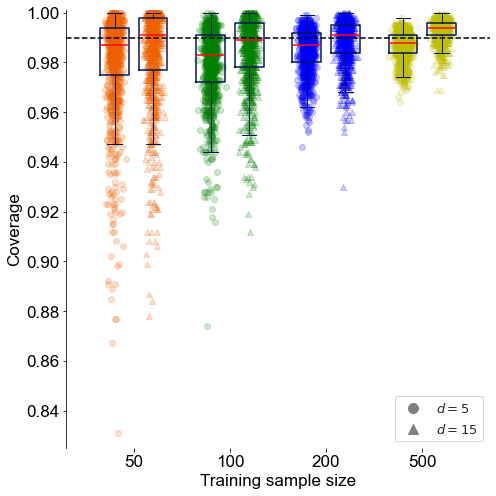

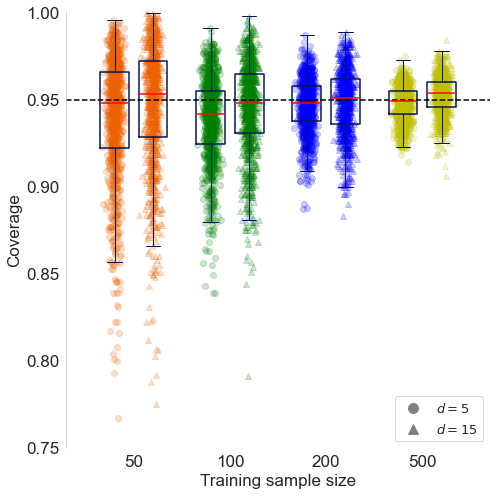

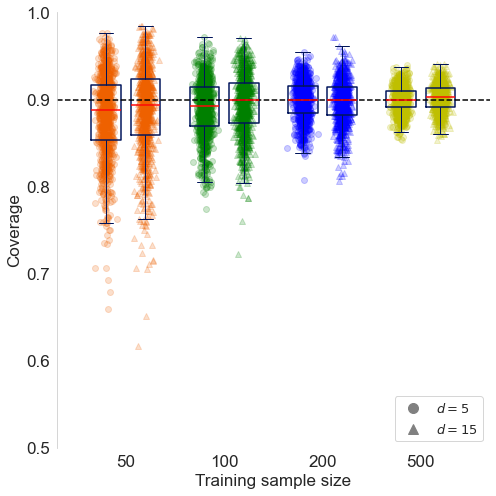

In [13]:
##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')
palette = ['#ee6100', 'g', 'b', 'y']


for df_5_data, df_15_data, alpha_level in zip(
    [ai_ii_SPD_coverage_df_df_5_alpha_01, ai_ii_SPD_coverage_df_df_5_alpha_05, ai_ii_SPD_coverage_df_df_5_alpha_1], 
    [ai_ii_SPD_coverage_df_df_15_alpha_01, ai_ii_SPD_coverage_df_df_15_alpha_05, ai_ii_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [df_5_data[df_5_data['train_size'] == size]['ai_ii_cov'].values for size in train_sizes]
    df_15_boxplot_data = [df_15_data[df_15_data['train_size'] == size]['ai_ii_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
        #mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
        #for j in range(len(train_sizes))
    ]
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'ai_df_5_15_II_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches='tight', dpi=75, format='png', transparent=True)
    plt.show()

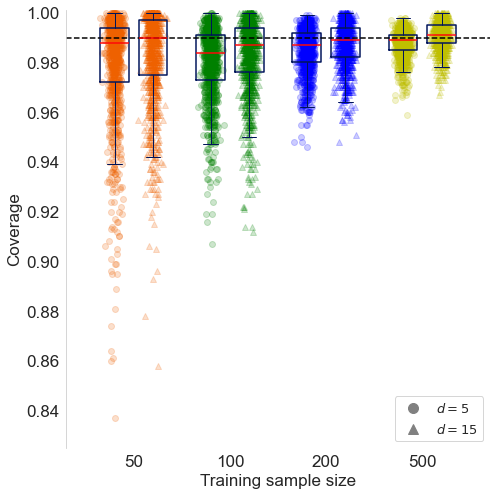

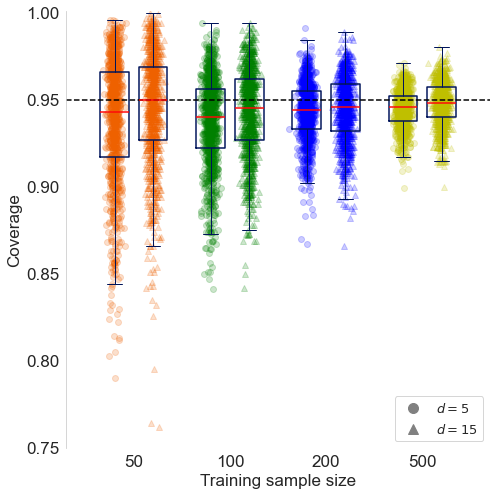

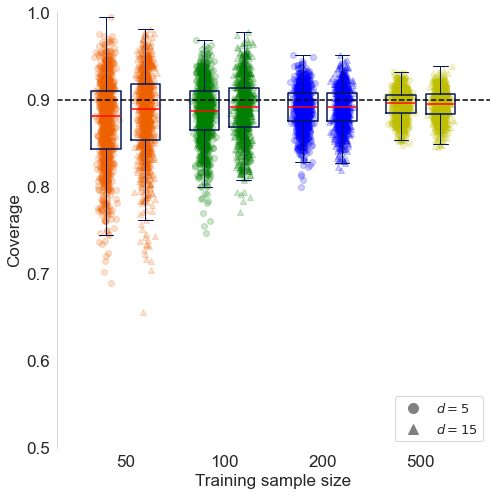

In [14]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for df_5_data, df_15_data, alpha_level in zip(
    [lc_ii_SPD_coverage_df_df_5_alpha_01, lc_ii_SPD_coverage_df_df_5_alpha_05, lc_ii_SPD_coverage_df_df_5_alpha_1], 
    [lc_ii_SPD_coverage_df_df_15_alpha_01, lc_ii_SPD_coverage_df_df_15_alpha_05, lc_ii_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [df_5_data[df_5_data['train_size'] == size]['lc_ii_cov'].values for size in train_sizes]
    df_15_boxplot_data = [df_15_data[df_15_data['train_size'] == size]['lc_ii_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
        # mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
        # for j in range(len(train_sizes))
    ]
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'lc_df_5_15_II_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches='tight', format='png', dpi=75, transparent=True)
    plt.show()

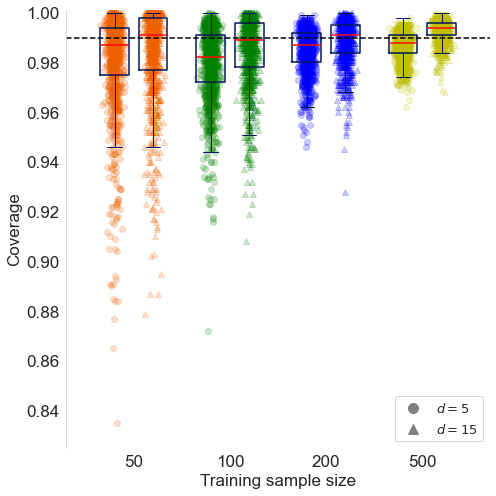

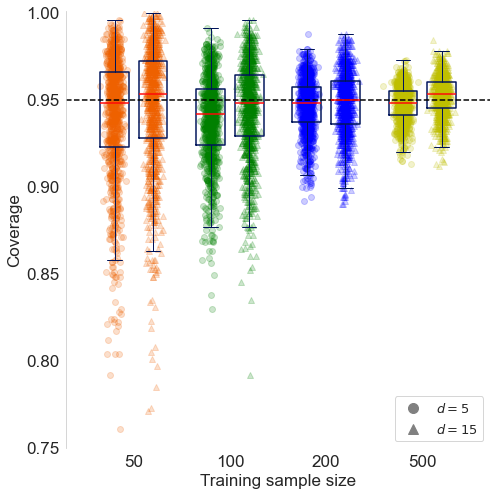

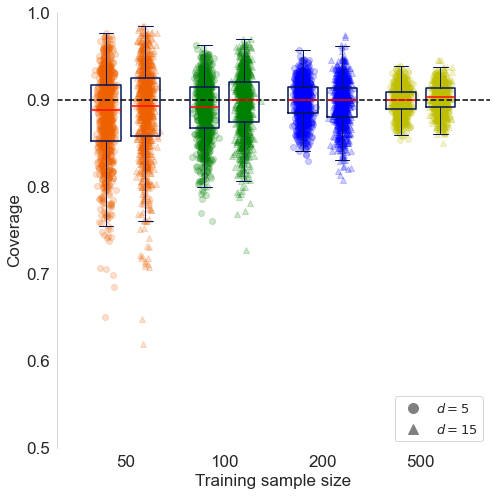

In [15]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')
palette = ['#ee6100', 'g', 'b', 'y']

for df_5_data, df_15_data, alpha_level in zip(
    [le_ii_SPD_coverage_df_df_5_alpha_01, le_ii_SPD_coverage_df_df_5_alpha_05, le_ii_SPD_coverage_df_df_5_alpha_1], 
    [le_ii_SPD_coverage_df_df_15_alpha_01, le_ii_SPD_coverage_df_df_15_alpha_05, le_ii_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [df_5_data[df_5_data['train_size'] == size]['le_ii_cov'].values for size in train_sizes]
    df_15_boxplot_data = [df_15_data[df_15_data['train_size'] == size]['le_ii_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
        # mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
        # for j in range(len(train_sizes))
    ]
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'le_df_5_15_II_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches='tight', format='png', dpi=75, transparent=True)
    plt.show()

In [16]:
ai_SPD_coverage_df_alpha_01 = ai_SPD_coverage_df.copy()
ai_SPD_coverage_df_alpha_05 = ai_SPD_coverage_df.copy()
ai_SPD_coverage_df_alpha_1  = ai_SPD_coverage_df.copy()

ai_SPD_coverage_df_alpha_01['ai_OOB_quantile'] = ai_SPD_coverage_df['ai_OOB_quantile'].apply(lambda x: x[0])
ai_SPD_coverage_df_alpha_05['ai_OOB_quantile'] = ai_SPD_coverage_df['ai_OOB_quantile'].apply(lambda x: x[1])
ai_SPD_coverage_df_alpha_1['ai_OOB_quantile'] = ai_SPD_coverage_df['ai_OOB_quantile'].apply(lambda x: x[2])

lc_SPD_coverage_df_alpha_01 = lc_SPD_coverage_df.copy()
lc_SPD_coverage_df_alpha_05 = lc_SPD_coverage_df.copy()
lc_SPD_coverage_df_alpha_1  = lc_SPD_coverage_df.copy()

lc_SPD_coverage_df_alpha_01['lc_OOB_quantile'] = lc_SPD_coverage_df['lc_OOB_quantile'].apply(lambda x: x[0])
lc_SPD_coverage_df_alpha_05['lc_OOB_quantile'] = lc_SPD_coverage_df['lc_OOB_quantile'].apply(lambda x: x[1])
lc_SPD_coverage_df_alpha_1['lc_OOB_quantile'] = lc_SPD_coverage_df['lc_OOB_quantile'].apply(lambda x: x[2])

le_SPD_coverage_df_alpha_01 = le_SPD_coverage_df.copy()
le_SPD_coverage_df_alpha_05 = le_SPD_coverage_df.copy()
le_SPD_coverage_df_alpha_1  = le_SPD_coverage_df.copy()

le_SPD_coverage_df_alpha_01['le_OOB_quantile'] = le_SPD_coverage_df['le_OOB_quantile'].apply(lambda x: x[0])
le_SPD_coverage_df_alpha_05['le_OOB_quantile'] = le_SPD_coverage_df['le_OOB_quantile'].apply(lambda x: x[1])
le_SPD_coverage_df_alpha_1['le_OOB_quantile'] = le_SPD_coverage_df['le_OOB_quantile'].apply(lambda x: x[2])

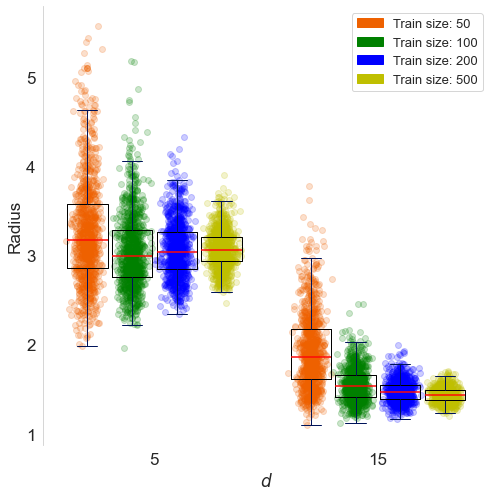

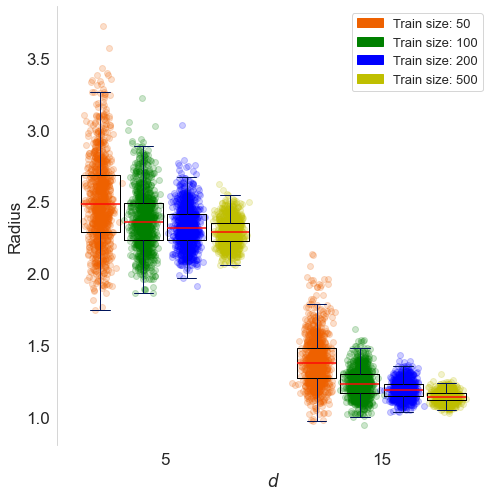

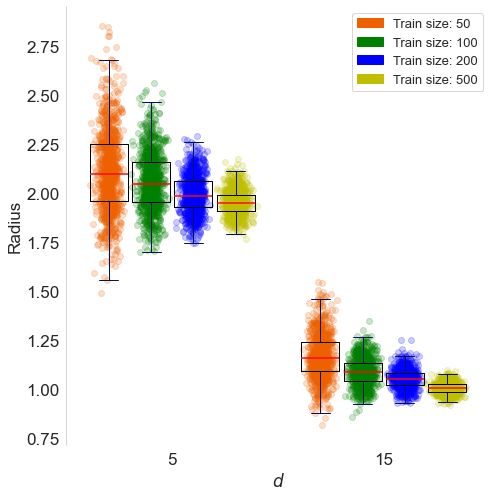

In [17]:
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data, alpha_level in zip(
    [ai_SPD_coverage_df_alpha_01, ai_SPD_coverage_df_alpha_05, ai_SPD_coverage_df_alpha_1], 
    [0.01, 0.05, 0.1]):
    if alpha_level == 0.01:
        coverage_df = ai_SPD_coverage_df_alpha_01
    elif alpha_level == 0.05:
        coverage_df = ai_SPD_coverage_df_alpha_05
    else:
        coverage_df = ai_SPD_coverage_df_alpha_1

    # Extract unique train sizes and degrees of freedom
    train_sizes = sorted(coverage_df['train_size'].unique())
    dfs = coverage_df['df'].unique()
    # Prepare the data for boxplots
    grouped_data = [
        [coverage_df.loc[(coverage_df['df'] == df) & (coverage_df['train_size'] == N), 'ai_OOB_quantile']
            for N in train_sizes]
        for df in dfs ]

    # Plotting
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    palette = ['#ee6100', 'g', 'b', 'y']  # Generate unique colors

    for i, group in enumerate(grouped_data):
        #In this loop, select the degrees of freedom
        base_position = 1 + i * (len(train_sizes) + 1)  # spacing between groups

        for j, ts_data in enumerate(group):
            #In this loop, select the train sizes. ts_data is the dataset for train size and df
            pos = base_position + j

            ax.boxplot(ts_data, positions=[pos], widths = .9, notch=False, whiskerprops=whiskerprops,capprops=capprops, showfliers=False, medianprops=medianprops,showmeans=False) 

            palette = ['#ee6100', 'g', 'b', 'y']
            for x, val in zip(np.random.normal(pos, 0.14, ts_data.shape[0]), ts_data):
                ax.scatter(x, val, alpha=0.2, color = palette[j])


    sns.despine(bottom=True) # removes right and top axis lines
    sns.set_style("whitegrid")

    # Formatting
    ax.set_xticks(
        ticks=[1 + i * (len(train_sizes) + 1) + (len(train_sizes) - 1) / 2 for i in range(len(dfs))],
        labels=dfs
    )
    ax.set_xlim(0, len(dfs) * (len(train_sizes) + 1))
        
    ax.set_xlabel(r'$d$', fontsize=17)
    ax.set_ylabel('Radius', fontsize=17)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17)
    legend_handles = [
        mpatches.Patch(color=palette[j], label=f'Train size: {train_sizes[j]}') 
        for j in range(len(train_sizes))
    ]
    ax.legend(handles=legend_handles, loc='upper right', fontsize=13)
    ax.grid(False)
    fig.tight_layout()
    
    filename = os.path.join(os.getcwd(), 'ai_SPD_radius_vs_df_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', format='png', dpi = 75, transparent=True)
    plt.show()

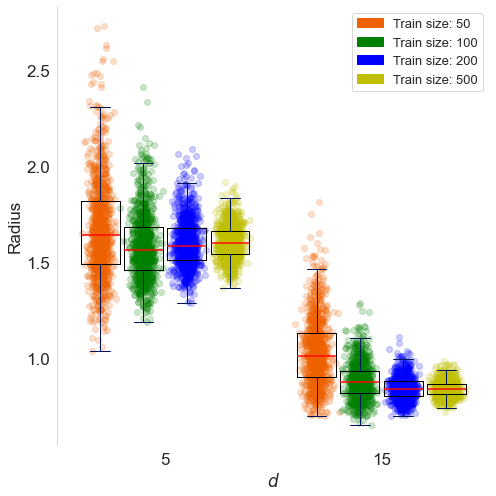

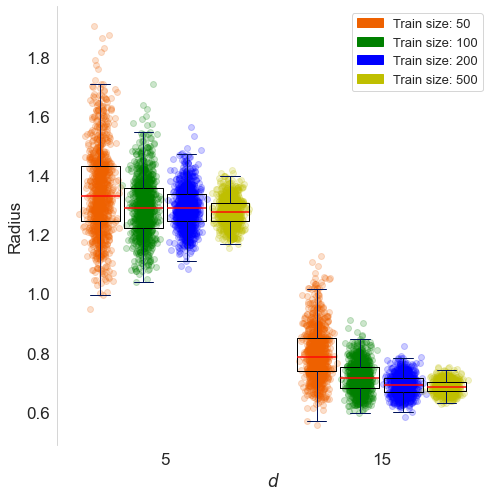

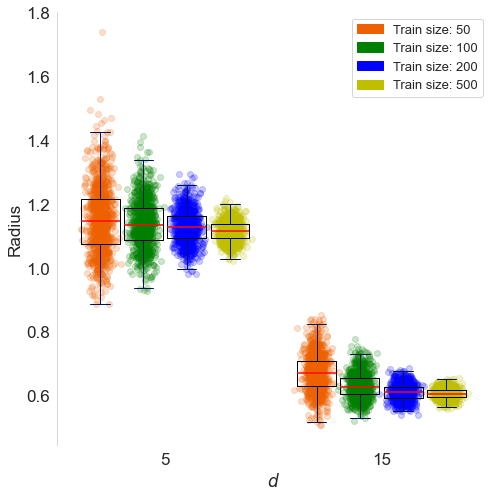

In [18]:
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data, alpha_level in zip(
    [lc_SPD_coverage_df_alpha_01, lc_SPD_coverage_df_alpha_05, lc_SPD_coverage_df_alpha_1], 
    [0.01, 0.05, 0.1]):
    if alpha_level == 0.01:
        coverage_df = lc_SPD_coverage_df_alpha_01
    elif alpha_level == 0.05:
        coverage_df = lc_SPD_coverage_df_alpha_05
    else:
        coverage_df = lc_SPD_coverage_df_alpha_1

    # Extract unique train sizes and degrees of freedom
    train_sizes = sorted(coverage_df['train_size'].unique())
    dfs = coverage_df['df'].unique()
    # Prepare the data for boxplots
    grouped_data = [
        [coverage_df.loc[(coverage_df['df'] == df) & (coverage_df['train_size'] == N), 'lc_OOB_quantile']
            for N in train_sizes]
        for df in dfs ]

    # Plotting
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    palette = ['#ee6100', 'g', 'b', 'y']  # Generate unique colors

    for i, group in enumerate(grouped_data):
        #In this loop, select the degrees of freedom
        base_position = 1 + i * (len(train_sizes) + 1)  # spacing between groups

        for j, ts_data in enumerate(group):
            #In this loop, select the train sizes. ts_data is the dataset for train size and df
            pos = base_position + j
            ax.boxplot(ts_data, positions=[pos], widths = .9, notch=False, whiskerprops=whiskerprops,capprops=capprops, showfliers=False, medianprops=medianprops,showmeans=False) 

            palette = ['#ee6100', 'g', 'b', 'y']
            for x, val in zip(np.random.normal(pos, 0.14, ts_data.shape[0]), ts_data):
                ax.scatter(x, val, alpha=0.2, color = palette[j])


    sns.despine(bottom=True) # removes right and top axis lines
    sns.set_style("whitegrid")

    # Formatting
    ax.set_xticks(
        ticks=[1 + i * (len(train_sizes) + 1) + (len(train_sizes) - 1) / 2 for i in range(len(dfs))],
        labels=dfs
    )
    ax.set_xlim(0, len(dfs) * (len(train_sizes) + 1))
        
    ax.set_xlabel(r'$d$', fontsize=17)
    ax.set_ylabel('Radius', fontsize=17)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17)
    legend_handles = [
        mpatches.Patch(color=palette[j], label=f'Train size: {train_sizes[j]}') 
        for j in range(len(train_sizes))
    ]
    ax.legend(handles=legend_handles, loc='upper right', fontsize=13)
    ax.grid(False)
    fig.tight_layout()
    
    filename = os.path.join(os.getcwd(), 'lc_SPD_radius_vs_df_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', format='png', dpi = 75, transparent=True)
    plt.show()

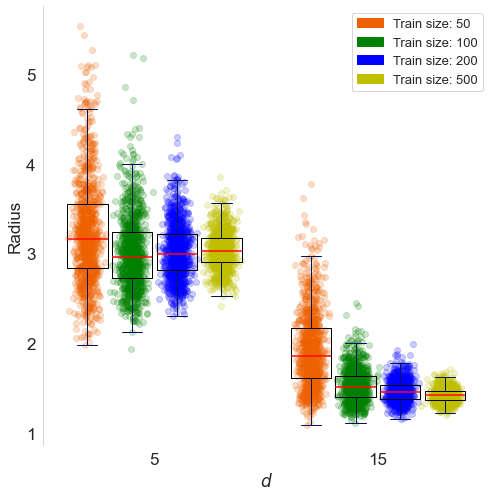

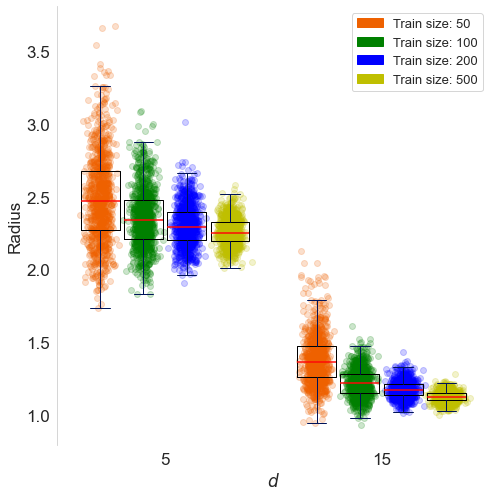

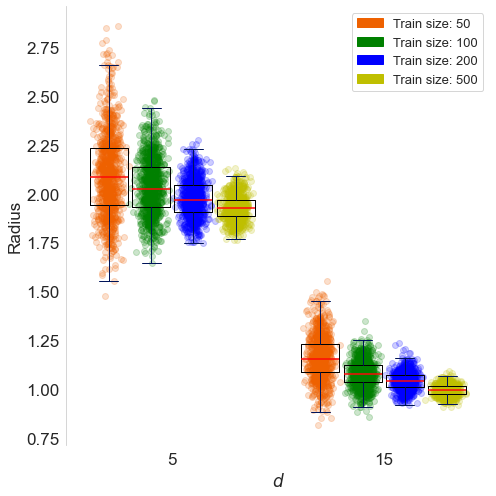

In [19]:
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data, alpha_level in zip(
    [le_SPD_coverage_df_alpha_01, le_SPD_coverage_df_alpha_05, le_SPD_coverage_df_alpha_1], 
    [0.01, 0.05, 0.1]):
    if alpha_level == 0.01:
        coverage_df = le_SPD_coverage_df_alpha_01
    elif alpha_level == 0.05:
        coverage_df = le_SPD_coverage_df_alpha_05
    else:
        coverage_df = le_SPD_coverage_df_alpha_1

    # Extract unique train sizes and degrees of freedom
    train_sizes = sorted(coverage_df['train_size'].unique())
    dfs = coverage_df['df'].unique()
    # Prepare the data for boxplots
    grouped_data = [
        [coverage_df.loc[(coverage_df['df'] == df) & (coverage_df['train_size'] == N), 'le_OOB_quantile']
            for N in train_sizes]
        for df in dfs ]

    # Plotting
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    palette = ['#ee6100', 'g', 'b', 'y']  # Generate unique colors

    for i, group in enumerate(grouped_data):
        #In this loop, select the degrees of freedom
        base_position = 1 + i * (len(train_sizes) + 1)  # spacing between groups

        for j, ts_data in enumerate(group):
            #In this loop, select the train sizes. ts_data is the dataset for train size and df
            pos = base_position + j
            ax.boxplot(ts_data, positions=[pos], widths = .9, notch=False, whiskerprops=whiskerprops,capprops=capprops, showfliers=False, medianprops=medianprops,showmeans=False) 

            for x, val in zip(np.random.normal(pos, 0.14, ts_data.shape[0]), ts_data):
                ax.scatter(x, val, alpha=0.2, color = palette[j])


    sns.despine(bottom=True) # removes right and top axis lines
    sns.set_style("whitegrid")

    # Formatting
    ax.set_xticks(
        ticks=[1 + i * (len(train_sizes) + 1) + (len(train_sizes) - 1) / 2 for i in range(len(dfs))],
        labels=dfs
    )
    ax.set_xlim(0, len(dfs) * (len(train_sizes) + 1))
        
    ax.set_xlabel(r'$d$', fontsize=17)
    ax.set_ylabel('Radius', fontsize=17)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17)
    legend_handles = [
        mpatches.Patch(color=palette[j], label=f'Train size: {train_sizes[j]}') 
        for j in range(len(train_sizes))
    ]
    ax.legend(handles=legend_handles, loc='upper right', fontsize=13)
    ax.grid(False)
    fig.tight_layout()
    
    filename = os.path.join(os.getcwd(), 'le_SPD_radius_vs_df_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', format='png', dpi=75, transparent=True)
    plt.show()

# TYPE III

In [20]:
import pandas as pd
import numpy as np

def calculate_type_iii_coverage(coverage_df, sample_sizes, df_values, B=500, random_seed=1):
    """
    Calculate Type I coverage using bootstrap procedure.
    
    Parameters:
    -----------
    pb_coverage_df : DataFrame
        Coverage results dataframe
    sample_sizes : list
        List of sample sizes to analyze
    df_values : list
        List of df values to analyze
    B : int
        Number of bootstrap replicates (default: 1000)
    
    Returns:
    --------
    dict : Bootstrap results with means and standard deviations
    """

    if random_seed is not None:
        np.random.seed(random_seed)
    
    ai_diccionario_iii = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    lc_diccionario_iii = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    le_diccionario_iii = {
        'df_5': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'df_15': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    for N in sample_sizes:
        for df in df_values:
            print(f"Processing N={N}, df={df}")
            
            # Filter data for current N and df
            coverage_df_N_df = coverage_df[
                (coverage_df['df'] == str(df)) & 
                (coverage_df['train_size'] == N)
            ]
            
            # Get M (number of samples for this N, df combination) and assert it is 1000
            M = len(coverage_df_N_df)
            print(M)
            #assert M == 1000, f"Expected M to be 1000, but got {M} for N={N}, df={df}"
            
            # Bootstrap procedure
            ai_bootstrap_estimates = []  # Will store B bootstrap estimates
            lc_bootstrap_estimates = []  # Will store B bootstrap estimates
            le_bootstrap_estimates = []  # Will store B bootstrap estimates

            ai_coverages = []  # Will store B bootstrap estimates
            lc_coverages = []  # Will store B bootstrap estimates
            le_coverages = []  # Will store B bootstrap estimates

            for m in range(M):
                # Extract row j_m^(b) of the dataset (training sample)
                training_sample_idx = m
                training_sample = coverage_df_N_df.iloc[training_sample_idx]
                
                # Extract element i_m^(b) from the i_cov column (test pair)
                test_pair_idx = m
                ai_coverage_for_this_pair = training_sample['ai_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                lc_coverage_for_this_pair = training_sample['lc_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                le_coverage_for_this_pair = training_sample['le_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                
                ai_coverages.append(ai_coverage_for_this_pair)
                lc_coverages.append(lc_coverage_for_this_pair)
                le_coverages.append(le_coverage_for_this_pair)
            

            # Convert to array and compute mean across the M bootstrap samples
            ai_coverages = np.array(ai_coverages)  # Shape: (M, 3)
            ai_p_hat_M = np.mean(ai_coverages, axis=0)  # Shape: (3,)
            lc_coverages = np.array(lc_coverages)  # Shape: (M, 3)
            lc_p_hat_M = np.mean(lc_coverages, axis=0)  # Shape: (3,)
            le_coverages = np.array(le_coverages)  # Shape: (M, 3)
            le_p_hat_M = np.mean(le_coverages, axis=0)  # Shape: (3,)

            for b in range(B):
                # Sample M indices for test pairs (i_1^(b), ..., i_M^(b))
                i_indices = np.random.choice(M, size=M, replace=True)
                
                # Sample M indices for training samples (j_1^(b), ..., j_M^(b))
                j_indices = np.random.choice(M, size=M, replace=True)
                
                # Extract bootstrap sample
                ai_bootstrap_coverages = []
                lc_bootstrap_coverages = []
                le_bootstrap_coverages = []
                
                for m in range(M):
                    # Extract row j_m^(b) of the dataset (training sample)
                    training_sample_idx = j_indices[m]
                    training_sample = coverage_df_N_df.iloc[training_sample_idx]
                    
                    # Extract element i_m^(b) from the i_cov column (test pair)
                    test_pair_idx = i_indices[m]
                    ai_coverage_for_this_pair = training_sample['ai_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                    lc_coverage_for_this_pair = training_sample['lc_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                    le_coverage_for_this_pair = training_sample['le_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                    
                    ai_bootstrap_coverages.append(ai_coverage_for_this_pair)
                    lc_bootstrap_coverages.append(lc_coverage_for_this_pair)
                    le_bootstrap_coverages.append(le_coverage_for_this_pair)
                
                # Convert to array and compute mean across the M bootstrap samples
                ai_bootstrap_coverages = np.array(ai_bootstrap_coverages)  # Shape: (M, 3)
                ai_p_hat_M_b = np.mean(ai_bootstrap_coverages, axis=0)  # Shape: (3,)

                lc_bootstrap_coverages = np.array(lc_bootstrap_coverages)  # Shape: (M, 3)
                lc_p_hat_M_b = np.mean(lc_bootstrap_coverages, axis=0)  # Shape: (3,)

                le_bootstrap_coverages = np.array(le_bootstrap_coverages)  # Shape: (M, 3)
                le_p_hat_M_b = np.mean(le_bootstrap_coverages, axis=0)  # Shape: (3,)
                
                ai_bootstrap_estimates.append(ai_p_hat_M_b)
                lc_bootstrap_estimates.append(lc_p_hat_M_b)
                le_bootstrap_estimates.append(le_p_hat_M_b)
            
            # Convert bootstrap estimates to array
            ai_bootstrap_estimates = np.array(ai_bootstrap_estimates)  # Shape: (B, 3)
            lc_bootstrap_estimates = np.array(lc_bootstrap_estimates)  # Shape: (B, 3)
            le_bootstrap_estimates = np.array(le_bootstrap_estimates)  # Shape: (B, 3)
            
            # Compute overall mean and standard deviation
            #ai_p_bar_M = np.mean(ai_bootstrap_estimates, axis=0)  # Shape: (3,)
            ai_sigma_boot = np.std(ai_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)
            #lc_p_bar_M = np.mean(lc_bootstrap_estimates, axis=0)  # Shape: (3,)
            lc_sigma_boot = np.std(lc_bootstrap_estimates, axis=0, ddof=1)
            #le_p_bar_M = np.mean(le_bootstrap_estimates, axis=0)  # Shape: (3,)
            le_sigma_boot = np.std(le_bootstrap_estimates, axis=0, ddof=1)
            
            # Store results
            df_key = f'df_{df}'
            N_key = str(N)
            ai_diccionario_iii[df_key][N_key]['means'] = ai_p_hat_M
            ai_diccionario_iii[df_key][N_key]['stds'] = ai_sigma_boot
            lc_diccionario_iii[df_key][N_key]['means'] = lc_p_hat_M
            lc_diccionario_iii[df_key][N_key]['stds'] = lc_sigma_boot
            le_diccionario_iii[df_key][N_key]['means'] = le_p_hat_M
            le_diccionario_iii[df_key][N_key]['stds'] = le_sigma_boot

            print(f"AI Bootstrap means: {ai_p_hat_M}")
            print(f"AI Bootstrap stds: {ai_sigma_boot}")
            print(f"LC Bootstrap means: {lc_p_hat_M}")
            print(f"LC Bootstrap stds: {lc_sigma_boot}")
            print(f"LE Bootstrap means: {le_p_hat_M}")
            print(f"LE Bootstrap stds: {le_sigma_boot}")

    return ai_diccionario_iii, lc_diccionario_iii, le_diccionario_iii

# Usage
sample_sizes = [50, 100, 200, 500]
# Parameters
df_values = [5, 15]  # Concentration parameters
q = 2

ai_diccionario_iii, lc_diccionario_iii, le_diccionario_iii = calculate_type_iii_coverage(
    coverage_df=SPD_coverage_df, 
    sample_sizes=sample_sizes, 
    df_values=df_values,
    B=500,  # Number of bootstrap replicates
    random_seed=1  # Optional: set a random seed for reproducibility
)

ai_diccionario_iii

Processing N=50, df=5
1000
AI Bootstrap means: [0.982 0.946 0.895]
AI Bootstrap stds: [0.00376263 0.00712874 0.00991911]
LC Bootstrap means: [0.984 0.944 0.877]
LC Bootstrap stds: [0.00423108 0.0072546  0.01026988]
LE Bootstrap means: [0.983 0.949 0.895]
LE Bootstrap stds: [0.00382433 0.00724074 0.0101663 ]
Processing N=50, df=15
1000
AI Bootstrap means: [0.993 0.968 0.927]
AI Bootstrap stds: [0.00256235 0.00563751 0.00833849]
LC Bootstrap means: [0.996 0.98  0.931]
LC Bootstrap stds: [0.00204761 0.00468618 0.00756529]
LE Bootstrap means: [0.994 0.967 0.923]
LE Bootstrap stds: [0.00258482 0.00564937 0.00825898]
Processing N=100, df=5
1000
AI Bootstrap means: [0.986 0.946 0.901]
AI Bootstrap stds: [0.00424897 0.00716408 0.00927708]
LC Bootstrap means: [0.978 0.934 0.876]
LC Bootstrap stds: [0.0045191  0.00792093 0.01049691]
LE Bootstrap means: [0.985 0.948 0.896]
LE Bootstrap stds: [0.00434963 0.00720077 0.00938478]
Processing N=100, df=15
1000
AI Bootstrap means: [0.984 0.959 0.919]
AI

{'df_5': {'50': {'means': array([0.982, 0.946, 0.895]),
   'stds': array([0.00376263, 0.00712874, 0.00991911])},
  '100': {'means': array([0.986, 0.946, 0.901]),
   'stds': array([0.00424897, 0.00716408, 0.00927708])},
  '200': {'means': array([0.978, 0.947, 0.886]),
   'stds': array([0.00423716, 0.00825599, 0.01030637])},
  '500': {'means': array([0.992, 0.962, 0.917]),
   'stds': array([0.00304553, 0.00643069, 0.00926958])}},
 'df_15': {'50': {'means': array([0.993, 0.968, 0.927]),
   'stds': array([0.00256235, 0.00563751, 0.00833849])},
  '100': {'means': array([0.984, 0.959, 0.919]),
   'stds': array([0.00334923, 0.00613858, 0.00847095])},
  '200': {'means': array([0.989, 0.961, 0.92 ]),
   'stds': array([0.00294781, 0.0062531 , 0.00859246])},
  '500': {'means': array([0.992, 0.961, 0.917]),
   'stds': array([0.0024849 , 0.00622811, 0.0087535 ])}}}

Prediction balls

In [21]:
# Prepare data for the DataFrame
ai_rows = []
le_rows = []
lc_rows = []
index = []

for df in [5, 15]:
    for N in [50, 100, 200, 500]:
        ai_row = []
        le_row = []
        lc_row = []
        ai_means = ai_diccionario_iii[f'df_{df}'][str(N)]['means']
        ai_stds = ai_diccionario_iii[f'df_{df}'][str(N)]['stds']
        le_means = le_diccionario_iii[f'df_{df}'][str(N)]['means']
        le_stds = le_diccionario_iii[f'df_{df}'][str(N)]['stds']
        lc_means = lc_diccionario_iii[f'df_{df}'][str(N)]['means']
        lc_stds = lc_diccionario_iii[f'df_{df}'][str(N)]['stds']
        # Format as "mean (std)"
        ai_formatted_values = [f"{100*ai_means[i]:.2f} ({100*ai_stds[i]:.2f})" for i in range(3)]
        ai_row.extend(ai_formatted_values)
        ai_rows.append(ai_row)
        le_formatted_values = [f"{100*le_means[i]:.2f} ({100*le_stds[i]:.2f})" for i in range(3)]
        le_row.extend(le_formatted_values)
        le_rows.append(le_row)
        lc_formatted_values = [f"{100*lc_means[i]:.2f} ({100*lc_stds[i]:.2f})" for i in range(3)]
        lc_row.extend(lc_formatted_values)
        lc_rows.append(lc_row)
        index.append((f"{df}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["d", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
ai_df = pd.DataFrame(ai_rows, index=row_index, columns=col_index)
le_df = pd.DataFrame(le_rows, index=row_index, columns=col_index)
lc_df = pd.DataFrame(lc_rows, index=row_index, columns=col_index)

# Display the DataFrames
ai_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               98.20 (0.38)  94.60 (0.71)  89.50 (0.99)
   100              98.60 (0.42)  94.60 (0.72)  90.10 (0.93)
   200              97.80 (0.42)  94.70 (0.83)  88.60 (1.03)
   500              99.20 (0.30)  96.20 (0.64)  91.70 (0.93)
15 50               99.30 (0.26)  96.80 (0.56)  92.70 (0.83)
   100              98.40 (0.33)  95.90 (0.61)  91.90 (0.85)
   200              98.90 (0.29)  96.10 (0.63)  92.00 (0.86)
   500              99.20 (0.25)  96.10 (0.62)  91.70 (0.88)

In [22]:
le_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               98.30 (0.38)  94.90 (0.72)  89.50 (1.02)
   100              98.50 (0.43)  94.80 (0.72)  89.60 (0.94)
   200              97.80 (0.43)  94.00 (0.83)  89.00 (1.02)
   500              99.30 (0.31)  96.10 (0.66)  90.90 (0.96)
15 50               99.40 (0.26)  96.70 (0.56)  92.30 (0.83)
   100              98.50 (0.33)  95.60 (0.62)  91.60 (0.88)
   200              98.80 (0.31)  95.80 (0.64)  91.80 (0.87)
   500              99.10 (0.26)  95.70 (0.64)  91.40 (0.89)

In [23]:
lc_df

Significance Level          0.01          0.05           0.1
d  N                                                        
5  50               98.40 (0.42)  94.40 (0.73)  87.70 (1.03)
   100              97.80 (0.45)  93.40 (0.79)  87.60 (1.05)
   200              98.10 (0.41)  93.30 (0.75)  87.30 (1.04)
   500              98.80 (0.35)  95.90 (0.66)  91.80 (0.89)
15 50               99.60 (0.20)  98.00 (0.47)  93.10 (0.76)
   100              98.70 (0.33)  95.80 (0.64)  90.60 (0.91)
   200              99.20 (0.30)  96.50 (0.62)  91.80 (0.84)
   500              99.40 (0.26)  95.80 (0.62)  89.90 (0.85)

In [31]:
# Define target coverage values that correspond to each column
# Column 0 (0.01): 0.99, Column 1 (0.05): 0.95, Column 2 (0.1): 0.90
target_coverages = [0.99, 0.95, 0.90]

# Apply formatting with column-specific target coverage
ai_latex = ai_df.copy()
le_latex = le_df.copy()
lc_latex = lc_df.copy()
for col_idx, col in enumerate(ai_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]

    for row_idx in ai_df.index:
        ai_latex.loc[row_idx, col] = format_cell(
            ai_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )
        le_latex.loc[row_idx, col] = format_cell(
            le_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )
        lc_latex.loc[row_idx, col] = format_cell(
            lc_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )

print(ai_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:aitypeIIIerrorcoverage'))
print(le_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:letypeIIIerrorcoverage'))
print(lc_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:lctypeIIIerrorcoverage'))

\begin{table}
\caption{Type III error}
\label{tab:aitypeIIIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
d & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{5} & 50 & 98.2 (0.38) & 94.6 (0.71) & 89.5 (0.99) \\
 & 100 & 98.6 (0.42) & 94.6 (0.72) & 90.1 (0.93) \\
 & 200 & \underline{97.8} (0.42) & 94.7 (0.83) & 88.6 (1.03) \\
 & 500 & 99.2 (0.30) & 96.2 (0.64) & 91.7 (0.93) \\
\cline{1-5}
\multirow[t]{4}{*}{15} & 50 & 99.3 (0.26) & \underline{96.8} (0.56) & \underline{92.7} (0.83) \\
 & 100 & 98.4 (0.33) & 95.9 (0.61) & \underline{91.9} (0.85) \\
 & 200 & 98.9 (0.29) & 96.1 (0.63) & \underline{92.0} (0.86) \\
 & 500 & 99.2 (0.25) & 96.1 (0.62) & 91.7 (0.88) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{Type III error}
\label{tab:letypeIIIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
d & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{5} & 50 & 98.3 

# Type IV

Hacemos todo con $X=0.25$.

### df 5

In [25]:
ai_iv_SPD_coverage_df_df_5_alpha_01 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()
ai_iv_SPD_coverage_df_df_5_alpha_05 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()
ai_iv_SPD_coverage_df_df_5_alpha_1  = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5'].copy()

lc_iv_SPD_coverage_df_df_5_alpha_01 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()
lc_iv_SPD_coverage_df_df_5_alpha_05 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()
lc_iv_SPD_coverage_df_df_5_alpha_1  = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5'].copy()

le_iv_SPD_coverage_df_df_5_alpha_01 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()
le_iv_SPD_coverage_df_df_5_alpha_05 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()
le_iv_SPD_coverage_df_df_5_alpha_1  = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5'].copy()

ai_iv_SPD_coverage_df_df_5_alpha_01['ai_iv_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_iv_cov'].apply(lambda x: x[0])
ai_iv_SPD_coverage_df_df_5_alpha_01['ai_OOB_quantile'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[0])

lc_iv_SPD_coverage_df_df_5_alpha_01['lc_iv_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_iv_cov'].apply(lambda x: x[0])
lc_iv_SPD_coverage_df_df_5_alpha_01['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[0])

le_iv_SPD_coverage_df_df_5_alpha_01['le_iv_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_iv_cov'].apply(lambda x: x[0])
le_iv_SPD_coverage_df_df_5_alpha_01['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[0])

ai_iv_SPD_coverage_df_df_5_alpha_05['ai_iv_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '5']['ai_iv_cov'].apply(lambda x: x[1])
ai_iv_SPD_coverage_df_df_5_alpha_05['ai_OOB_quantile'] = ai_SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[1])

lc_iv_SPD_coverage_df_df_5_alpha_05['lc_iv_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_iv_cov'].apply(lambda x: x[1])
lc_iv_SPD_coverage_df_df_5_alpha_05['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[1])

le_iv_SPD_coverage_df_df_5_alpha_05['le_iv_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_iv_cov'].apply(lambda x: x[1])
le_iv_SPD_coverage_df_df_5_alpha_05['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[1])

ai_iv_SPD_coverage_df_df_5_alpha_1['ai_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_iv_cov'].apply(lambda x: x[2])
ai_iv_SPD_coverage_df_df_5_alpha_1['ai_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['ai_OOB_quantile'].apply(lambda x: x[2])

lc_iv_SPD_coverage_df_df_5_alpha_1['lc_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['lc_iv_cov'].apply(lambda x: x[2])
lc_iv_SPD_coverage_df_df_5_alpha_1['lc_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['lc_OOB_quantile'].apply(lambda x: x[2])

le_iv_SPD_coverage_df_df_5_alpha_1['le_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['le_iv_cov'].apply(lambda x: x[2])
le_iv_SPD_coverage_df_df_5_alpha_1['le_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '5']['le_OOB_quantile'].apply(lambda x: x[2])

ai_iv_SPD_coverage_df_df_5_alpha_01.head()
ai_iv_SPD_coverage_df_df_5_alpha_05.head()
ai_iv_SPD_coverage_df_df_5_alpha_1.head()

,train_size,df,ai_i_cov,ai_ii_cov,ai_iii_cov,ai_iv_cov,ai_OOB_quantile
0,200,5,"[[True, True, True], [True, True, True], [True...","[0.98, 0.94, 0.854]","[[True, True, True], [True, True, True], [True...",0.723,1.907268
1,100,5,"[[True, True, True], [True, True, True], [True...","[0.968, 0.906, 0.862]","[[True, True, True], [True, True, True], [True...",0.868,1.888584
3,500,5,"[[True, True, True], [True, True, False], [Tru...","[0.989, 0.953, 0.87]","[[False, False, False], [True, True, True], [T...",0.889,1.850574
6,200,5,"[[True, True, True], [True, True, True], [True...","[0.996, 0.966, 0.888]","[[True, True, True], [True, True, True], [True...",0.908,1.946233
8,200,5,"[[True, True, True], [True, True, True], [True...","[0.977, 0.916, 0.855]","[[True, True, True], [True, True, True], [True...",0.885,1.837652


## df 15

In [26]:
ai_iv_SPD_coverage_df_df_15_alpha_01 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()
ai_iv_SPD_coverage_df_df_15_alpha_05 = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()
ai_iv_SPD_coverage_df_df_15_alpha_1  = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15'].copy()

lc_iv_SPD_coverage_df_df_15_alpha_01 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()
lc_iv_SPD_coverage_df_df_15_alpha_05 = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()
lc_iv_SPD_coverage_df_df_15_alpha_1  = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15'].copy()

le_iv_SPD_coverage_df_df_15_alpha_01 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()
le_iv_SPD_coverage_df_df_15_alpha_05 = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()
le_iv_SPD_coverage_df_df_15_alpha_1  = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15'].copy()

ai_iv_SPD_coverage_df_df_15_alpha_01['ai_iv_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_iv_cov'].apply(lambda x: x[0])
ai_iv_SPD_coverage_df_df_15_alpha_01['ai_OOB_quantile'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[0])

lc_iv_SPD_coverage_df_df_15_alpha_01['lc_iv_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_iv_cov'].apply(lambda x: x[0])
lc_iv_SPD_coverage_df_df_15_alpha_01['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[0])

le_iv_SPD_coverage_df_df_15_alpha_01['le_iv_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_iv_cov'].apply(lambda x: x[0])
le_iv_SPD_coverage_df_df_15_alpha_01['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[0])

ai_iv_SPD_coverage_df_df_15_alpha_05['ai_iv_cov'] = ai_SPD_coverage_df[ai_SPD_coverage_df['df'] == '15']['ai_iv_cov'].apply(lambda x: x[1])
ai_iv_SPD_coverage_df_df_15_alpha_05['ai_OOB_quantile'] = ai_SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[1])

lc_iv_SPD_coverage_df_df_15_alpha_05['lc_iv_cov'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_iv_cov'].apply(lambda x: x[1])
lc_iv_SPD_coverage_df_df_15_alpha_05['lc_OOB_quantile'] = lc_SPD_coverage_df[lc_SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[1])

le_iv_SPD_coverage_df_df_15_alpha_05['le_iv_cov'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_iv_cov'].apply(lambda x: x[1])
le_iv_SPD_coverage_df_df_15_alpha_05['le_OOB_quantile'] = le_SPD_coverage_df[le_SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[1])

ai_iv_SPD_coverage_df_df_15_alpha_1['ai_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_iv_cov'].apply(lambda x: x[2])
ai_iv_SPD_coverage_df_df_15_alpha_1['ai_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['ai_OOB_quantile'].apply(lambda x: x[2])

lc_iv_SPD_coverage_df_df_15_alpha_1['lc_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['lc_iv_cov'].apply(lambda x: x[2])
lc_iv_SPD_coverage_df_df_15_alpha_1['lc_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['lc_OOB_quantile'].apply(lambda x: x[2])

le_iv_SPD_coverage_df_df_15_alpha_1['le_iv_cov'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['le_iv_cov'].apply(lambda x: x[2])
le_iv_SPD_coverage_df_df_15_alpha_1['le_OOB_quantile'] = SPD_coverage_df[SPD_coverage_df['df'] == '15']['le_OOB_quantile'].apply(lambda x: x[2])

ai_iv_SPD_coverage_df_df_15_alpha_01.head()
ai_iv_SPD_coverage_df_df_15_alpha_05.head()
ai_iv_SPD_coverage_df_df_15_alpha_1.head()

,train_size,df,ai_i_cov,ai_ii_cov,ai_iii_cov,ai_iv_cov,ai_OOB_quantile
2,100,15,"[[True, True, True], [True, True, True], [True...","[1.0, 0.995, 0.957]","[[True, True, True], [True, True, True], [True...",0.978,1.238969
4,200,15,"[[True, True, True], [True, True, True], [True...","[0.995, 0.951, 0.874]","[[True, True, True], [True, True, True], [True...",0.883,1.000028
5,50,15,"[[False, False, False], [True, True, True], [T...","[0.958, 0.906, 0.818]","[[True, True, True], [True, True, True], [True...",0.889,1.004048
7,500,15,"[[True, True, True], [True, True, True], [True...","[0.994, 0.971, 0.925]","[[True, True, True], [True, True, True], [True...",0.929,1.046566
9,50,15,"[[True, False, False], [True, True, True], [Tr...","[0.984, 0.949, 0.907]","[[True, True, True], [True, True, True], [True...",0.925,1.126903


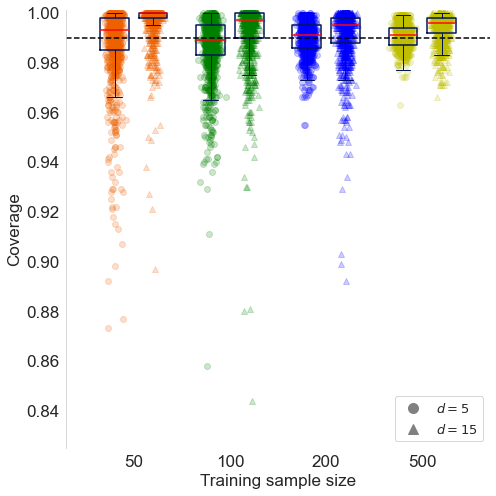

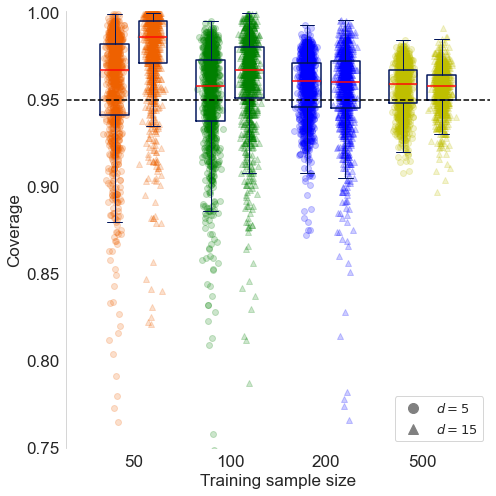

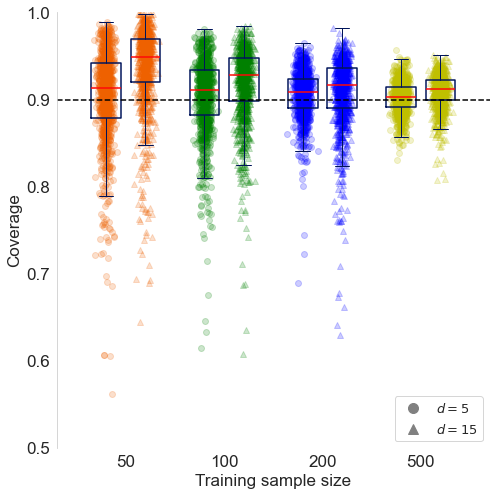

In [27]:
##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data_5, data_15, alpha_level in zip(
    [ai_iv_SPD_coverage_df_df_5_alpha_01, ai_iv_SPD_coverage_df_df_5_alpha_05, ai_iv_SPD_coverage_df_df_5_alpha_1],
    [ai_iv_SPD_coverage_df_df_15_alpha_01, ai_iv_SPD_coverage_df_df_15_alpha_05, ai_iv_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [data_5[data_5['train_size'] == size]['ai_iv_cov'].values for size in train_sizes]
    df_15_boxplot_data = [data_15[data_15['train_size'] == size]['ai_iv_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
    
    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
       # mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
       # for j in range(len(train_sizes))
    ]
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'ai_df_5_15_IV_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', format='png', dpi=75, transparent=True)
    plt.show()

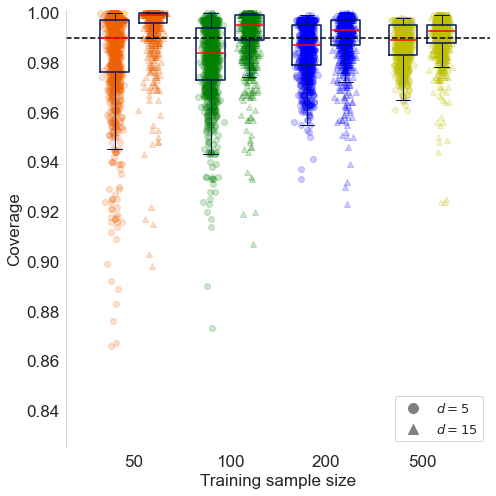

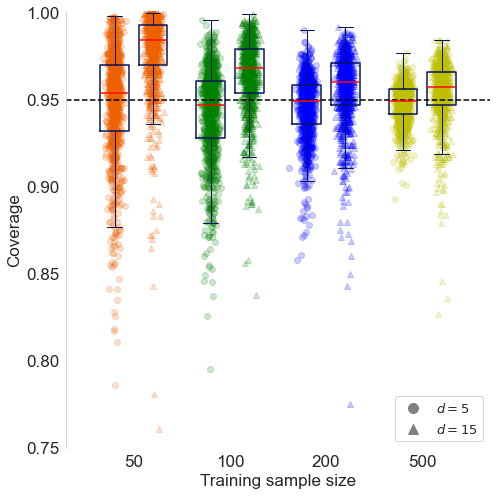

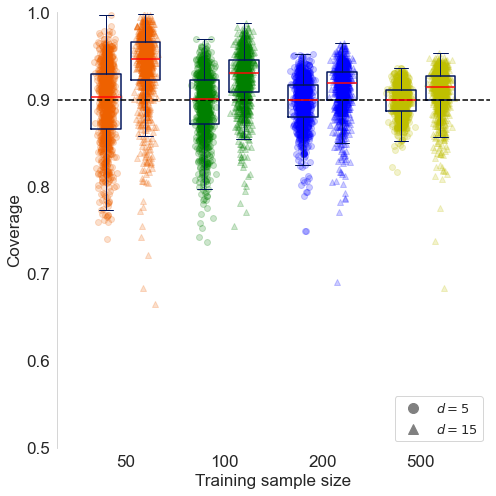

In [28]:
##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data_5, data_15, alpha_level in zip(
    [lc_iv_SPD_coverage_df_df_5_alpha_01, lc_iv_SPD_coverage_df_df_5_alpha_05, lc_iv_SPD_coverage_df_df_5_alpha_1],
    [lc_iv_SPD_coverage_df_df_15_alpha_01, lc_iv_SPD_coverage_df_df_15_alpha_05, lc_iv_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [data_5[data_5['train_size'] == size]['lc_iv_cov'].values for size in train_sizes]
    df_15_boxplot_data = [data_15[data_15['train_size'] == size]['lc_iv_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
    
    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
        # mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
        # for j in range(len(train_sizes))
    ]
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'lc_df_5_15_IV_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', format='png', dpi = 75, transparent=True)
    plt.show()

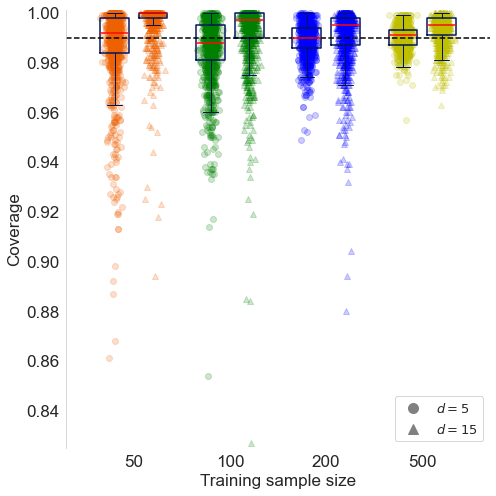

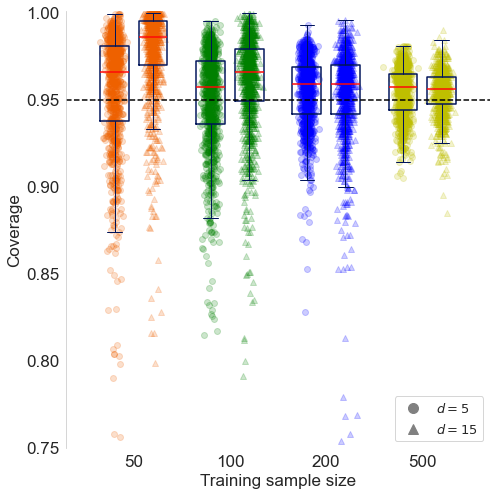

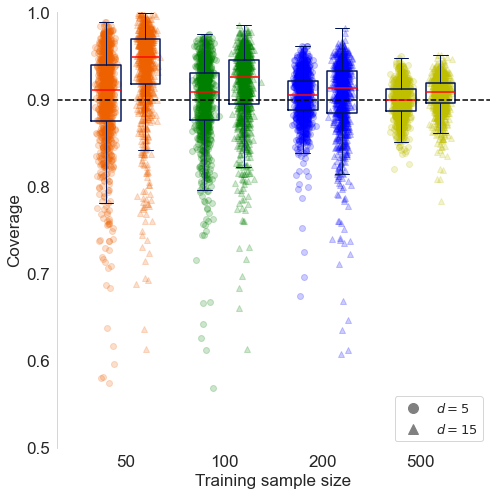

In [29]:
##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for data_5, data_15, alpha_level in zip(
    [le_iv_SPD_coverage_df_df_5_alpha_01, le_iv_SPD_coverage_df_df_5_alpha_05, le_iv_SPD_coverage_df_df_5_alpha_1],
    [le_iv_SPD_coverage_df_df_15_alpha_01, le_iv_SPD_coverage_df_df_15_alpha_05, le_iv_SPD_coverage_df_df_15_alpha_1], 
    [0.01, 0.05, 0.1]):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    df_5_boxplot_data = [data_5[data_5['train_size'] == size]['le_iv_cov'].values for size in train_sizes]
    df_15_boxplot_data = [data_15[data_15['train_size'] == size]['le_iv_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    positions_df_5 = np.array(range(len(train_sizes))) - 0.2
    positions_df_15 = np.array(range(len(train_sizes))) + 0.2

    sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
    
    ax.boxplot(df_5_boxplot_data, positions=positions_df_5, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)
               
    ax.boxplot(df_15_boxplot_data, positions=positions_df_15, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               showfliers=False,
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False)

    # Scatter plot
    palette_df_5 = ['#ee6100', 'g', 'b', 'y']
    palette_df_15 = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        xs_df_5 = np.random.normal(positions_df_5[i], 0.04, len(df_5_boxplot_data[i]))
        xs_df_15 = np.random.normal(positions_df_15[i], 0.04, len(df_15_boxplot_data[i]))

        ax.scatter(xs_df_5, df_5_boxplot_data[i], alpha=0.2, color=palette_df_5[i], label='Prediction balls')
        ax.scatter(xs_df_15, df_15_boxplot_data[i], alpha=0.2, color=palette_df_15[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.825, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1.001)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    legend_handles = [
        #mpatches.Patch(color=palette[j], label=f'train size: {train_sizes[j]}')
        #for j in range(len(train_sizes))
    ]
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label=r'$d = 5$'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label=r'$d = 15$'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(),'le_df_5_15_IV_coverage_' + str(alpha_level)[2:] + '.png')
    fig.savefig(filename, bbox_inches = 'tight', dpi = 75, format='png', transparent=True)
    plt.show()